CarND-Behavioral Cloning Project. Code Research


Cell complete
9498
9498


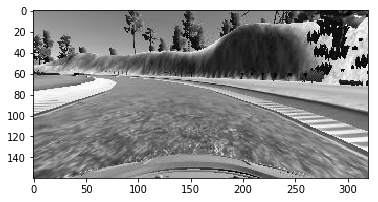

(18996, 160, 320, 1)

job done


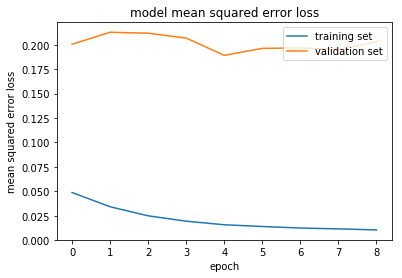

In [2]:
import cv2
import numpy as np
import csv

lines = []
with open('./data1_r/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
images = []
measurements = []
correction_factor = 0.35 #For correcting Left and Right steering

for line in lines:    
    for i in range(3):
        source_path = line[i]
        filename = source_path.split('\\')[-1]
        current_path = './data1_r/IMG/' + filename
        image = cv2.imread(current_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)
    measurements.append(measurement + correction_factor)
    measurements.append(measurement - correction_factor)

print ('Cell complete')
print (len(images))
print (len(measurements))

# Flip images for additional data
augmented_images, augmented_measurements = [], []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement * -1.0)
    
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

# Show demo image
from matplotlib import pyplot as plt
plt.imshow(augmented_images[0], cmap='gray')
plt.show()

# Resize X_train data to fit model
X_train = X_train.reshape(len(X_train), 160, 320, 1)
print (X_train.shape)

from keras.models import Sequential, Model
from keras.layers import Cropping2D, Lambda, Flatten,Dense,Dropout

from keras.layers.convolutional import Convolution2D

# Nvidia model
model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,320,1)))
model.add(Cropping2D(cropping=((70,25),(0,0))))
model.add(Dropout(0.2))
model.add(Convolution2D(24,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(36,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(48,5,5,subsample=(2,2),activation="relu"))
model.add(Dropout(0.2))
model.add(Convolution2D(64,3,3,activation="relu"))
model.add(Convolution2D(64,3,3,activation="relu"))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

# Compile model, showing progress bar if run in jupyter notebook
from keras_tqdm import TQDMNotebookCallback

model.compile(loss='mse', optimizer='adam') 
history_object = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=9, verbose=0, callbacks=[TQDMNotebookCallback()])
model.save('model.h5')
print('job done')

import matplotlib.pyplot as plt

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()